# More Distributions and the Central Limit Theorem
> It’s time to explore one of the most important probability distributions in statistics, normal distribution. You’ll create histograms to plot normal distributions and gain an understanding of the central limit theorem, before expanding your knowledge of statistical functions by adding the Poisson, exponential, and t-distributions to your repertoire. This is the Summary of lecture "Introduction to Statistics in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Statistics]
- image: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The Normal Distrubtion
- The normal distribution
    - Symmetrical
    - Area = 1
    - Curve never hits 0
    - Described by mean and standard deviation

### Distribution of Amir's sales
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the `amount` column of `amir_deals` As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the `amount` variable follows.

In [3]:
amir_deals = pd.read_csv('./dataset/amir_deals.csv', index_col=0)
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


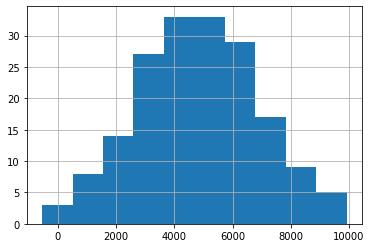

In [4]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10);

### Probabilities from the normal distribution
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the `amount` column of `amir_deals` and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.



In [9]:
from scipy.stats import norm

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)
print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


### Simulating sales under new market conditions
The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution.

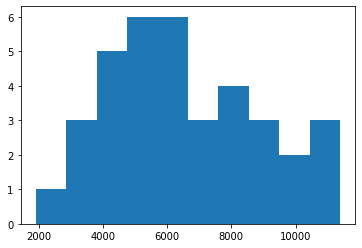

In [11]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, 36)

# Create histogram and show
plt.hist(new_sales);

## The central limit theorem
- Sampling Distribution
- Central limit theorem (CLT)
    - The sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases
    - Samples should be random and indepdendent


### The CLT in action
The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the `num_users` column of `amir_deals` more closely, which contains the number of people who intend to use the product Amir is selling.

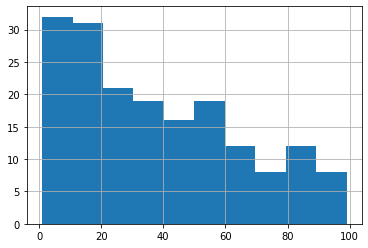

In [12]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist();

32.0


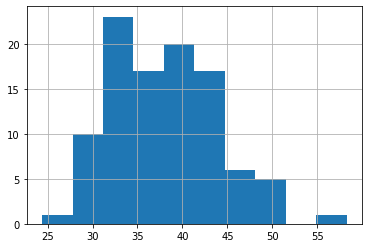

In [17]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take the mean of samp_20
print(np.mean(samp_20))

sample_means = []
# Loop 100 times
for i in range(100):
    # Take sample of 20 num_users
    samp_20 = amir_deals['num_users'].sample(20, replace=True)
    # Calculate mean of samp_20
    samp_20_mean = np.mean(samp_20)
    # Append samp_20_mean to sample_means
    sample_means.append(samp_20_mean)
    
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist();

### The mean of means
You want to know what the average number of users (`num_users`) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

In [18]:
all_deals = pd.read_csv('./dataset/all_deals.csv', index_col=0)
all_deals.head()

,product,num_users
Unnamed: 0,,
1,3544,19
2,5073,43
3,6149,87
4,7863,83
5,14,17


In [19]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
    # Take sample of size 20 from num_users col of all_deals with replacement
    cur_sample = all_deals['num_users'].sample(20, replace=True)
    # Take mean of cur_sample
    cur_mean = np.mean(cur_sample)
    # Append cur_mean to sample_means
    sample_means.append(cur_mean)
    
# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(amir_deals['num_users'].mean())

38.31333333333332
37.651685393258425


## The Poisson distribution
- Poisson process
    - Events appear to happen at a certain rate, but completely at random
    - Examples
        - Number of animals adopted from an animal shelter per week
        - Number of people arriving at a restaurant per hour
        - Number of earthquakes in California per year
    - Time unit is irrelevant, as long as you use the same unit when talking about the same situation
- Poisson distribution
    - Probability of some # of events occurring over a fixed period of time
    - Examples
        - Probability of $\geq$ 5 animals adopted from an animal shelter per week
        - Probability of 12 people arriving at a restaurant per hour
        - Probability of $\lt$ 20 earthquakes in California per year
- Lambda $\lambda$
    - Average number of events per time interval
- CLT still applies!

### Tracking lead responses
Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.



In [27]:
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)
print(prob_5)

# Probability of 5 response
prob_coworker = poisson.pmf(5, 5.5)
print(prob_coworker)

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)
print(prob_2_or_less)

# Probability of > 10 response
prob_over_10 = 1 - poisson.cdf(10, 4)
print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315


## More probability distributions
- Exponential distribution
    - Probability of time between Poisson events
    - Example
        - Probability of $\gt$ 1 day between adoptions
        - Probability of $\lt$ 10 minutes between restaurant arrivals
        - Probability of 6-8 months between earthquakes
    - Also uses $\lambda$
    - Continuous (time)
- (Student's) t-distribution
    - Similar shape as the normal distribution
- Degress of Freedom  (DoF)
    - Parameter degree of freedom (df) which affects the thickness of the tails
    - Lower DF: thicker tails, higher standard deviation
    - Higher DF: closer to normal distribution
- Log-normal distribution
    - Variable whose logarithm is normally distributed
    - Results in distributions that are skewed, unlike the normal distribution

### Modeling time between leads
To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes 2.5 hours for him to respond. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.



In [31]:
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, 0.4))

# Print probability response takes > 4 hours
print(1 - expon.cdf(4, 0.4))

# Print probability response takes 3-4 hours
print(expon.cdf(4, 0.4) - expon.cdf(3, 0.4))

0.4511883639059735
0.02732372244729253
0.04694985576704136
